In [1]:
## This code generates Figure S25

In [2]:
from __future__ import division
import  matplotlib.pyplot as plt

import pandas as pd
import linecache
import numpy as np
import os
import sys
import scipy.stats as stats

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table

In [3]:
def dd_plot_ci_pi(dt,fillcolor,edgecolor,transparency,includeCI,md):
    dt['D'] = np.log10(dt['x'])
    dt['y'] = dt['similarity']
    regfit = smf.ols('y ~ D',dt).fit()
    r2 = regfit.rsquared
    params = regfit.params
    a=params[0]
    b = params[1]
    st, data, ss2 = summary_table(regfit, alpha =0.05)
    print regfit.summary()
    
    fittedvalues = data[:,2]
    predict_mean_se  = data[:,3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
    predict_ci_low, predict_ci_upp = data[:,6:8].T	

    data_intervals = {'D':  dt['D'], 'predict_low': predict_ci_low, 'predict_upp': predict_ci_upp, 'conf_low': predict_mean_ci_low, 'conf_high': predict_mean_ci_upp}
    df_intervals = pd.DataFrame(data=data_intervals)
    df_intervals_sort = df_intervals.sort_values(by='D')

    for kind in md:
        d = dt.loc[dt['primer']==kind]
        if kind == 'v6':
            plt.scatter(d.D, d.y,marker = md[kind],color = 'grey',edgecolor = 'crimson', alpha= transparency , s = 25, linewidths=0.5,label=None)
        else:
            plt.scatter(d.D, d.y,marker = md[kind],color = 'maroon',edgecolor = 'crimson', alpha= transparency , s = 25, linewidths=0.5,label=None)	

    plt.plot(dt['D'], fittedvalues, '-', lw=2, color = fillcolor,label=r'All; $R^2=0.37$')

    if 'yes' in includeCI:
        plt.fill_between(df_intervals_sort['D'], df_intervals_sort['conf_high'], df_intervals_sort['conf_low'], color=fillcolor, alpha = 0.5,lw=0.0)
    return r2, a, b

In [4]:
def special_plot_ci_pi(dt,variabletype,var,color,linetype,transparency,includeCI,md,includePI):
    dt['N'] = np.log10(dt['x'])
    dt['y'] = dt['similarity']
    dt = dt.loc[dt[variabletype]==var]
    regfit = smf.ols('y ~ N',dt).fit()
    r2 = regfit.rsquared
    params = regfit.params
    a=params[0]
    b = params[1]
    st, data, ss2 = summary_table(regfit, alpha =0.05)
    print regfit.summary()

    fittedvalues = data[:,2]
    predict_mean_se  = data[:,3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
    predict_ci_low, predict_ci_upp = data[:,6:8].T	

    data_intervals = {'N':  dt['N'], 'predict_low': predict_ci_low, 'predict_upp': predict_ci_upp, 'conf_low': predict_mean_ci_low, 'conf_high': predict_mean_ci_upp}
    df_intervals = pd.DataFrame(data=data_intervals)
    df_intervals_sort = df_intervals.sort_values(by='N')

    plt.plot(dt['N'], fittedvalues, linetype, lw=1, color = color) #,label=legendtitle)

    for kind in md:
        d = dt.loc[dt['primer']==kind]
        plt.scatter(d.N, d.y,marker = md[kind],color = 'white',edgecolor = 'black', alpha= 1 , s = 25, linewidths=0.5,label=None)				
        plt.scatter(d.N, d.y,marker = md[kind],color = color,edgecolor = 'black', alpha= transparency , s = 25, linewidths=0.5,label=None)	

    if 'yes' in includeCI:
        plt.fill_between(df_intervals_sort['N'], df_intervals_sort['conf_high'], df_intervals_sort['conf_low'], color=color, alpha = 0.25,lw=0.0)


    if 'yes' in includePI:
        plt.plot(df_intervals_sort['N'], df_intervals_sort['predict_low'], '--', lw=1, color = color)
        plt.plot(df_intervals_sort['N'], df_intervals_sort['predict_upp'], '--', lw=1, color = color)

    return r2, a, b


In [5]:
def plot_dd_fig():
    fig = plt.figure(figsize=(11.69,8.27))
    fs = 8 # font size used across figures
    plt.ylim(0, 1)
    plt.xlim(-3.1, 5)

    df = pd.read_csv(mydir + 'data/SubsurfaceDistanceDecay/closedref_distance_sorensen_Depth_no_0.csv')
    
    mkr_dict = {'v1v3': 'h', 'v3v5': '+', 'v6':'o','v6v4':'D','different primers': '*', 'v4v5': '^','different primers': '.'}
    colordict = {'FennoScandian Shield': 'cyan', 'different regions': 'black', 'USA': 'magenta', 'South Africa':'orange','Iceland':'darkgoldenrod'}

    markerList = []
    colorList = []

    for item in df['primer']:
        markerList.append(mkr_dict[item])
    for item in df['locality']:
        colorList.append(colordict[item])

    df['marker']=markerList
    df['color']=colorList

    print 'Distance Decay for All Samples'
    dd_plot_ci_pi(df,'maroon','red',0.75,'yes',mkr_dict)
    print 'Distance Decay for V6 primers'
    special_plot_ci_pi(df,'primer','v6','Grey','-',0.9,'yes',mkr_dict,'no')
    print 'Distance Decay for samples from USA'
    special_plot_ci_pi(df,'locality','USA','magenta','-',0.8,'yes',mkr_dict,'no')
    plt.show()

Distance Decay for All Samples
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     1332.
Date:                Tue, 31 Jul 2018   Prob (F-statistic):          1.09e-230
Time:                        16:14:25   Log-Likelihood:                 803.54
No. Observations:                2316   AIC:                            -1603.
Df Residuals:                    2314   BIC:                            -1592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3525

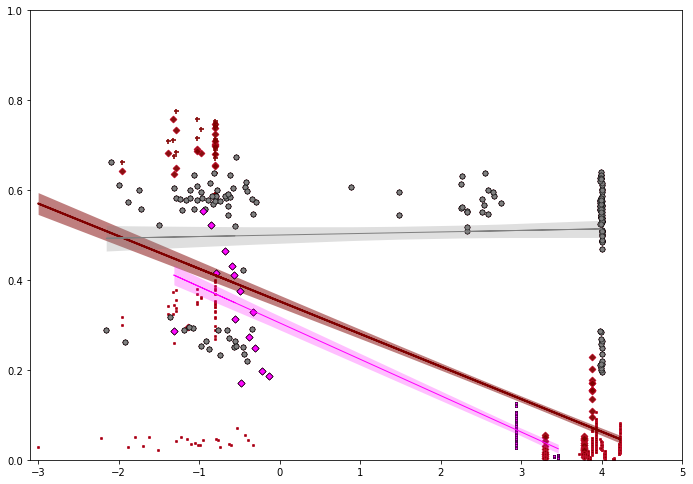

In [6]:
mydir = os.path.expanduser("~/Desktop/ScalingMicroBiodiversity-master/")
plot_dd_fig()